In [2]:
!python3 -m pip install numpy scipy
!python3 -m pip install scikit-learn
!python3 -m pip install pillow
!python3 -m pip install h5py
!python3 -m pip install tensorflow
!python3 -m pip install keras

  Using cached tensorflow-2.3.1-cp38-cp38-macosx_10_14_x86_64.whl (165.2 MB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-0.10.0-py3-none-any.whl (127 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.3.0-py3-none-any.whl (6.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.32.0-cp38-cp38-macosx_10_9_x86_64.whl (3.3 MB)
Processing /Users/sylvainjiang/Library/Caches/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501/termcolor-1.1.0-py3-none-any.whl
  Using cached protobuf-3.13.0-cp38-cp38-macosx_10_9_x86_64.whl (1.3 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     |████████████████████████████████| 95 kB 733 kB/s eta 0:00:01
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from common.utils import load_data, mape, TimeSeriesTensor, create_evaluation_df
import datetime as dt
import os

In [4]:
os

<module 'os' from '/Users/sylvainjiang/opt/anaconda3/lib/python3.8/os.py'>

In [5]:
uber = pd.read_csv('../uber_data.csv',parse_dates=["pickup_dt"])

In [123]:
uber.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [7]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [69]:
valid_start_dt = '2015-04-20 00:00:00'
test_start_dt = '2015-05-26 00:00:00'

In [70]:
T = 10
HORIZON = 1

In [71]:


#--------------------------------------------------------------------------------

#TRAIN

#--------------------------------------------------------------------------------



In [122]:
train = uber.copy()[uber.pickup_dt < valid_start_dt][['pickups','pickup_dt']]
train=train.set_index('pickup_dt')
y_scaler = MinMaxScaler()
y_scaler.fit(train[['pickups']])

X_scaler = MinMaxScaler()
train[['pickups']] = X_scaler.fit_transform(train)
train.head()

,pickups
pickup_dt,
2015-01-01 01:00:00,0.022216
2015-01-01 01:00:00,0.222011
2015-01-01 01:00:00,0.000000
2015-01-01 01:00:00,0.768489
2015-01-01 01:00:00,0.059193


In [121]:
train_shifted = train.copy()
train_shifted['y_t+1'] = train_shifted.shift(periods=-1)

for i in range(10):
    train_shifted['pickups-'+str(i)]=train_shifted['pickups'].shift(periods=i)
train_shifted = train_shifted.rename(columns={'pickups':'pickups_original'})
train_shifted = train_shifted.dropna()

y_train = train_shifted[['y_t+1']].to_numpy()
X_train = train_shifted.drop(columns=['y_t+1','pickups_original']).to_numpy()
X_train = X_train[... , np.newaxis]
train_shifted.head()


,pickups_original,y_t+1,pickups-0,pickups-1,pickups-2,pickups-3,pickups-4,pickups-5,pickups-6,pickups-7,pickups-8,pickups-9
pickup_dt,,,,,,,,,,,,
2015-01-01 02:00:00,0.000000,0.635048,0.000000,0.179626,0.017539,0.000585,0.000877,0.059193,0.768489,0.000000,0.222011,0.022216
2015-01-01 02:00:00,0.635048,0.048378,0.635048,0.000000,0.179626,0.017539,0.000585,0.000877,0.059193,0.768489,0.000000,0.222011
2015-01-01 02:00:00,0.048378,0.001023,0.048378,0.635048,0.000000,0.179626,0.017539,0.000585,0.000877,0.059193,0.768489,0.000000
2015-01-01 02:00:00,0.001023,0.001608,0.001023,0.048378,0.635048,0.000000,0.179626,0.017539,0.000585,0.000877,0.059193,0.768489
2015-01-01 02:00:00,0.001608,0.019293,0.001608,0.001023,0.048378,0.635048,0.000000,0.179626,0.017539,0.000585,0.000877,0.059193


In [78]:


#--------------------------------------------------------------------------------

#valid

#--------------------------------------------------------------------------------



In [79]:
look_back_dt = dt.datetime.strptime(valid_start_dt, '%Y-%m-%d %H:%M:%S') - dt.timedelta(hours=T-1)
valid = uber.copy()[(uber.pickup_dt >=look_back_dt) & (uber.pickup_dt < test_start_dt)][['pickups','pickup_dt']]
scaler=MinMaxScaler()
valid=valid.set_index("pickup_dt")
valid['pickups'] = scaler.fit_transform(valid)
valid.head()

,pickups
pickup_dt,
2015-04-19 15:00:00,0.009352
2015-04-19 15:00:00,0.114290
2015-04-19 15:00:00,0.000000
2015-04-19 15:00:00,0.322239
2015-04-19 15:00:00,0.058726


In [112]:
valid_shifted = valid.copy()
valid_shifted['y+1'] = valid_shifted.shift(periods=-1)

for i in range(10):
    valid_shifted['pickups-'+str(i)]=valid_shifted['pickups'].shift(periods=i)
valid_shifted = valid_shifted.rename(columns={'pickups':'pickups_original'})
valid_shifted=valid_shifted.dropna()
y_valid = valid_shifted[['y+1']].to_numpy()
X_valid = valid_shifted.drop(columns=['pickups_original','y+1']).to_numpy()
X_valid = X_valid[... , np.newaxis]
valid_shifted.head()

,pickups_original,y+1,pickups-0,pickups-1,pickups-2,pickups-3,pickups-4,pickups-5,pickups-6,pickups-7,pickups-8,pickups-9
pickup_dt,,,,,,,,,,,,
2015-04-19 16:00:00,0.000000,0.346307,0.000000,0.113602,0.008527,0.000275,0.000275,0.058726,0.322239,0.000000,0.114290,0.009352
2015-04-19 16:00:00,0.346307,0.065603,0.346307,0.000000,0.113602,0.008527,0.000275,0.000275,0.058726,0.322239,0.000000,0.114290
2015-04-19 16:00:00,0.065603,0.000963,0.065603,0.346307,0.000000,0.113602,0.008527,0.000275,0.000275,0.058726,0.322239,0.000000
2015-04-19 16:00:00,0.000963,0.000275,0.000963,0.065603,0.346307,0.000000,0.113602,0.008527,0.000275,0.000275,0.058726,0.322239
2015-04-19 16:00:00,0.000275,0.007977,0.000275,0.000963,0.065603,0.346307,0.000000,0.113602,0.008527,0.000275,0.000275,0.058726


In [82]:
from keras.models import Model, Sequential
from keras.layers import Conv1D, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [83]:
LATENT_DIM = 5
KERNEL_SIZE = 2
BATCH_SIZE = 32
EPOCHS = 10

In [84]:
model = Sequential()
model.add(Conv1D(LATENT_DIM,kernel_size=KERNEL_SIZE,activation='relu',dilation_rate=1,input_shape=(T,1)))
model.add(Conv1D(LATENT_DIM,kernel_size=KERNEL_SIZE,dilation_rate=2,activation='relu'))
model.add(Conv1D(LATENT_DIM,kernel_size=KERNEL_SIZE,dilation_rate=4,activation='relu'))
model.add(Flatten())
model.add(Dense(1,activation='linear'))

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 9, 5)              15        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 7, 5)              55        
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 3, 5)              55        
_________________________________________________________________
flatten_2 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [86]:
from keras.optimizers import Adam
opt=Adam()
model.compile(optimizer=opt,loss='mse')

In [87]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [88]:
best_val = ModelCheckpoint('model_{epoch:02d}.h5', save_best_only=True, mode='min', period=1)

In [89]:
history = model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop, best_val],
          verbose=1)

Epoch 1/10
543/543 [==============================] - 2s 3ms/step - loss: 0.0116 - val_loss: 0.0061
Epoch 2/10
543/543 [==============================] - 2s 3ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 3/10
543/543 [==============================] - 3s 5ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 4/10
543/543 [==============================] - 2s 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 5/10
543/543 [==============================] - 2s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/10
543/543 [==============================] - 2s 4ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/10
543/543 [==============================] - 2s 5ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/10
543/543 [==============================] - 3s 6ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/10
543/543 [==============================] - 4s 7ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/10
543/543 [==============================] - 3s 6ms/step - loss: 0.0011 - val_loss: 0.0012

In [90]:
best_epoch =np.argmin(np.array(history.history['val_loss']))+1
model.load_weights("model_{:02d}.h5".format(best_epoch))

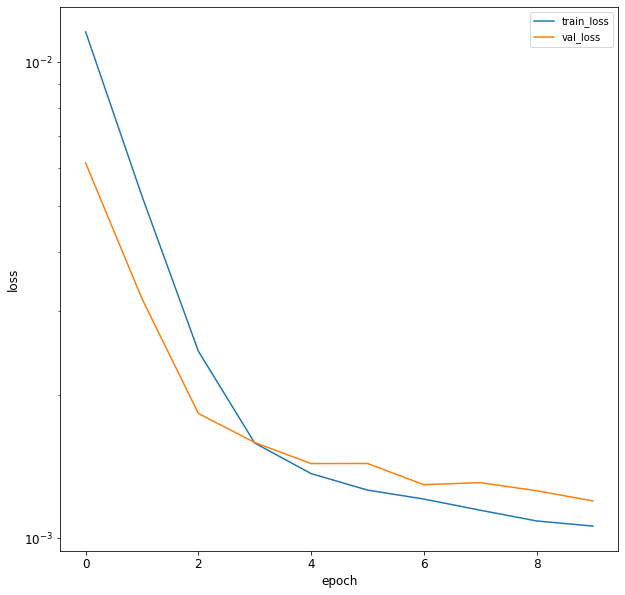

In [91]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [114]:
look_back_dt = dt.datetime.strptime(test_start_dt, '%Y-%m-%d %H:%M:%S') - dt.timedelta(hours=T-1)
test = uber.copy()[uber.pickup_dt>test_start_dt][['pickups','pickup_dt']]
test=test.set_index('pickup_dt')
test['pickups'] = scaler.transform(test)
test.head()

,pickups
pickup_dt,
2015-05-26 01:00:00,0.005639
2015-05-26 01:00:00,0.051987
2015-05-26 01:00:00,0.000000
2015-05-26 01:00:00,0.095310
2015-05-26 01:00:00,0.040985


In [113]:
test_shifted = test.copy()
test_shifted['y+1'] = test_shifted.shift(periods=-1)

for i in range(10):
    test_shifted['pickups-'+str(i)]=test_shifted['pickups'].shift(periods=i)
test_shifted = test_shifted.rename(columns={'pickups':'pickups_original'})
test_shifted=test_shifted.dropna()
y_test = test_shifted[['y+1']].to_numpy()
X_test = test_shifted.drop(columns=['pickups_original','y+1']).to_numpy()
X_test = X_test[... , np.newaxis]

test_shifted.head()

,pickups_original,y+1,pickups-0,pickups-1,pickups-2,pickups-3,pickups-4,pickups-5,pickups-6,pickups-7,pickups-8,pickups-9
pickup_dt,,,,,,,,,,,,
2015-05-26 02:00:00,0.000000,0.054188,0.000000,0.033145,0.004951,0.000275,0.000275,0.040985,0.095310,0.000000,0.051987,0.005639
2015-05-26 02:00:00,0.054188,0.010590,0.054188,0.000000,0.033145,0.004951,0.000275,0.000275,0.040985,0.095310,0.000000,0.051987
2015-05-26 02:00:00,0.010590,0.000138,0.010590,0.054188,0.000000,0.033145,0.004951,0.000275,0.000275,0.040985,0.095310,0.000000
2015-05-26 02:00:00,0.000138,0.000138,0.000138,0.010590,0.054188,0.000000,0.033145,0.004951,0.000275,0.000275,0.040985,0.095310
2015-05-26 02:00:00,0.000138,0.002613,0.000138,0.000138,0.010590,0.054188,0.000000,0.033145,0.004951,0.000275,0.000275,0.040985


In [103]:
predictions = model.predict(X_test)
predictions

array([[ 0.05331985],
       [ 0.03513982],
       [-0.00863031],
       ...,
       [ 0.05043046],
       [ 0.00265139],
       [ 0.01587494]], dtype=float32)

In [104]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df[['prediction', 'actual']] = scaler.inverse_transform(eval_df[['prediction', 'actual']])
eval_df.head()

,timestamp,h,prediction,actual
0,2015-05-26 02:00:00,t+1,387.688596,394.0
1,2015-05-26 02:00:00,t+1,255.501642,77.0
2,2015-05-26 02:00:00,t+1,-62.751006,1.0
3,2015-05-26 02:00:00,t+1,-59.748078,1.0
4,2015-05-26 02:00:00,t+1,148.542132,19.0


In [105]:
mape(eval_df['prediction'], eval_df['actual'])

inf